In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
type(raw_data)

pandas.core.frame.DataFrame

In [4]:
raw_data.head()

price     size  year         view
0  234314.144   643.09  2015  No sea view
1  228581.528   656.22  2009  No sea view
2  281626.336   487.29  2018     Sea view
3  401255.608  1504.75  2015  No sea view
4  458674.256  1275.46  2009     Sea view

In [5]:
data = raw_data.copy()
type(data)

pandas.core.frame.DataFrame

In [6]:
# Transform categorical vals into numerical vals
data['view'] = data['view'].map({'No sea view': 0, 'Sea view': 1})

In [7]:
data.head(10)

price     size  year  view
0  234314.144   643.09  2015     0
1  228581.528   656.22  2009     0
2  281626.336   487.29  2018     1
3  401255.608  1504.75  2015     0
4  458674.256  1275.46  2009     1
5  245050.280   575.19  2006     1
6  265129.064   570.89  2015     1
7  175716.480   620.82  2006     0
8  331101.344   682.26  2018     1
9  218630.608   694.52  2009     0

In [8]:
data.describe()

price         size         year        view
count     100.000000   100.000000   100.000000  100.000000
mean   292289.470160   853.024200  2012.600000    0.490000
std     77051.727525   297.941951     4.729021    0.502418
min    154282.128000   479.750000  2006.000000    0.000000
25%    234280.148000   643.330000  2009.000000    0.000000
50%    280590.716000   696.405000  2015.000000    0.000000
75%    335723.696000  1029.322500  2018.000000    1.000000
max    500681.128000  1842.510000  2018.000000    1.000000

## Regression

In [9]:
y = data['price']
x1 = data[['size', 'year', 'view']]

In [10]:
x = sm.add_constant(x1)

D:\Program Files\Miniconda3\envs\venv\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
results = sm.OLS(y, x).fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           1.02e-50
Time:                        20:14:39   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check multicollinearity

### Using Variance Inflation Factor

In [13]:
data.columns

Index(['price', 'size', 'year', 'view'], dtype='object')

In [14]:
new_df = data[['view', 'size','year']] #Subset the data to a new data frame
new_df.columns

Index(['view', 'size', 'year'], dtype='object')

In [15]:
new_df.head(5)

view     size  year
0     0   643.09  2015
1     0   656.22  2009
2     1   487.29  2018
3     0  1504.75  2015
4     1  1275.46  2009

In [16]:
vif = pd.DataFrame()
vif["Variance Inflation Factor"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
vif["features"] = new_df.columns

In [17]:
vif.round(1)

Variance Inflation Factor features
0                        2.0     view
1                        9.3     size
2                       10.0     year

VIF Table shows that Size & Year have high VIF values, exceeding 5 which might be highly correlated with other explaintory predictors.

### Remove correlated indp var to see what happen

In [18]:
data_wo_year = data.drop(['year', 'price'], axis=1)
vif_2 = pd.DataFrame()
vif_2["Variance Inflation Factor"] = [variance_inflation_factor(data_wo_year.values, i) for i in range(data_wo_year.shape[1])]
vif_2["features"] = data_wo_year.columns

In [19]:
vif_2

Variance Inflation Factor features
0                   1.822989     size
1                   1.822989     view

In [20]:
new_y = data['price']
new_x = data_wo_year.copy()
new_x = sm.add_constant(new_x)
new_results = sm.OLS(new_y, new_x).fit()
new_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           2.44e-46
Time:                        20:14:39   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using eigen values of correlation matrix as another approach

In [21]:
new_df.columns

Index(['view', 'size', 'year'], dtype='object')

In [22]:
corrMatrix = np.corrcoef(new_df.values, rowvar=False) # Compute the correlation matrix of coefficients
corrMatrix

array([[ 1.        ,  0.04560586,  0.02805899],
       [ 0.04560586,  1.        , -0.09767811],
       [ 0.02805899, -0.09767811,  1.        ]])

In [23]:
eValue, eVector = np.linalg.eig(corrMatrix) # Determine the eigenvalues and eigenvectors of correlation matrix
eValue

array([0.87964508, 1.02088072, 1.0994742 ])

The result of eigenvalues of correlation matrix depicts that each eigenvalue corresponds to each variable is not close to 0 -> there is no multicollinearity exists.
In this case the eigenvalue of each variable is:
- viewEValue = 0.87964508
- sizeEValue = 1.02088072
- yearEValue = 1.0994742

# Principal Component Analysis

In [24]:
# Reverse order of eigenvectors from the highest to the lowest corresponds to its eigenvalue
eValue = np.flip(eValue)
eVector = np.flip(eVector, axis=0)
# Initialize variables to compute PCA
totalInformation = 0
for val in eValue:
    totalInformation += val
print('Total Information:', totalInformation)

dimReductionMatrix = np.empty((eVector.shape[0], eVector.shape[1]))
for v in eVector:
    np.append(dimReductionMatrix, v)

cmpPercentage = np.empty(eValue.shape[0])
for i in range(cmpPercentage.shape[0]):
    cmpPercentage[i] = round((eValue[i] / totalInformation) * 100, 2)
cmpPercentage

Total Information: 3.0


array([36.65, 34.03, 29.32])

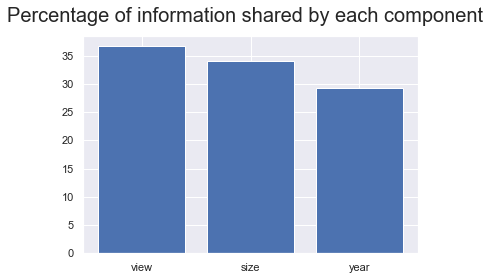

In [25]:
bars = np.array(new_df.columns)
y_pos = np.arange(bars.shape[0])

# Create bars
plt.bar(y_pos, cmpPercentage)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Create title for bar chart
plt.suptitle('Percentage of information shared by each component', fontsize=20)

# Show graphic
plt.show()
